In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle as pkl
import scipy
from radis import calc_spectrum
from radis import load_spec
from radis.test.utils import getTestFile
from radis import Spectrum

from inversion_tools_remastered import *

# Regularised inversion code

Functions are defined in `inversion_tools`. We first define a few parameters, such as the species of interest, and the spectral ranges. We then load up the data, and subset things spectrally.


In [82]:
# Species and spectral bounds (in cm^{-1}) as a dictionary.
bounds = {
    "CO2": (6250, 6600),
    "CH4": [9100, 9700],
    "H2O": [5500, 5900],
    "CO": [2500, 4000],
}
selected_spectra = list(bounds.keys())

(spectra_obs, absorption_spectra, species_names, wv_obs) = read_data(
    selected_spectra,
    "spectra/test_series/", # Location of the series we want to invert.
    "spectra/templates/" # Location of the individual species "template" absorption
)

100%|██████████| 4/4 [00:00<00:00, 39.68it/s]


In [3]:
import pickle
with open('compounds' + 'CH3OH' + '.pickle', 'rb') as handle:
    Compounds = pickle.load(handle)

C2H2 [625, 830] hitran
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             C2H2
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          830.0000 cm-1
   wavenum_min          625.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\C2H2.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  aut

.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             SiH
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          4000.0000 cm-1
   wavenum_min          3600.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             exomol-radisdb
   dbpath               C:\Users\luker\.radisdb\exomol\SiH\28Si-1H\SiGHTLY
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Using ExoMol database MoLLIST for 40Ca-19F
Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/CaF/40Ca-19F/40Ca-19F__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/CaF/40Ca-19F/40Ca-19F__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/CaF/40Ca-19F/40Ca-19F__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\CaF\40Ca-19F\MoLLIST\40Ca-19F__MoLLIST.trans.bz2
.broad is used.


C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\api\exomolapi.py:1189: Warning: 
                    No default broadening exponent in def file. Assigned n = 0.5
                    
  warnings.warn(
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\api\exomolapi.py:1199: Warning: 
                    No default broadening in def file. Assigned alpha_ref = 0.07
                    
  warnings.warn(
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: LinestrengthCutoffWarning: Estimated error after discarding lines is large: 0.26%. Consider reducing cutoff
  warnings.warn(WarningType(message))
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             CaF
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2320.0000 cm-1
   wavenum_min          2175.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             exomol-radisdb
   dbpath               C:\Users\luker\.radisdb\exomol\CaF\40Ca-19F\MoLLIST
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
 

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


0.04s - Spectrum calculated
CH3Br [825, 1100] hitran
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             CH3Br
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1100.0000 cm-1
   wavenum_min          825.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\CH3Br.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  T

0.30s - Spectrum calculated
H2S [3500, 4150] hitran
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             H2S
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          4150.0000 cm-1
   wavenum_min          3500.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\H2S.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True


C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


HF [3400, 4400] hitran
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             HF
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          4400.0000 cm-1
   wavenum_min          3400.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\HF.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto


C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.022 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0072 cm⁻¹. You can use wstep='auto' to get the optimal spectral grid value. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` or change the 'GRIDPOINTS_PER_LINEWIDTH_WARN_THRESHOLD' key of radis.config / your ~/radis.json (if you know what you're doing!)
  warnings.warn(WarningType(message))


0.28s - Spectrum calculated
NO [1700, 2000] hitran
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             NO
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2000.0000 cm-1
   wavenum_min          1700.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\NO.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.02 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0066 cm⁻¹. You can use wstep='auto' to get the optimal spectral grid value. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` or change the 'GRIDPOINTS_PER_LINEWIDTH_WARN_THRESHOLD' key of radis.config / your ~/radis.json (if you know what you're doing!)
  warnings.warn(WarningType(message))


0.27s - Spectrum calculated
HCl [5200, 5900] hitran
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             HCl
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          5900.0000 cm-1
   wavenum_min          5200.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\HCl.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True


C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.025 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0083 cm⁻¹. You can use wstep='auto' to get the optimal spectral grid value. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` or change the 'GRIDPOINTS_PER_LINEWIDTH_WARN_THRESHOLD' key of radis.config / your ~/radis.json (if you know what you're doing!)
  warnings.warn(WarningType(message))


0.21s - Spectrum calculated
NH [2800, 3450] exomol
Using ExoMol database MoLLIST for 14N-1H
Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/NH/14N-1H/14N-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/NH/14N-1H/14N-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/NH/14N-1H/14N-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\NH\14N-1H\MoLLIST\14N-1H__MoLLIST.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             NH
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution  

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\api\exomolapi.py:1189: Warning: 
                    No default broadening exponent in def file. Assigned n = 0.5
                    
  warnings.warn(
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\api\exomolapi.py:1199: Warning: 
                    No default broadening in def file. Assigned alpha_ref = 0.07
                    
  warnings.warn(
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


0.07s - Spectrum calculated
SiH2 [800, 1300] exomol
Using ExoMol database CATS for 28Si-1H2 (recommended by the ExoMol team). All available databases are ['xsec-CATS', 'CATS']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__00000-01000.trans.bz2
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__01000-02000.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


1.39s - Spectrum calculated
SiH2 [1800, 2200] exomol
Using ExoMol database CATS for 28Si-1H2 (recommended by the ExoMol team). All available databases are ['xsec-CATS', 'CATS']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__01000-02000.trans.bz2
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__02000-03000.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
---------

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


1.44s - Spectrum calculated
SiH2 [2750, 3250] exomol
Using ExoMol database CATS for 28Si-1H2 (recommended by the ExoMol team). All available databases are ['xsec-CATS', 'CATS']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__02000-03000.trans.bz2
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__03000-04000.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
---------

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


2.09s - Spectrum calculated
SiH2 [3700, 4200] exomol
Using ExoMol database CATS for 28Si-1H2 (recommended by the ExoMol team). All available databases are ['xsec-CATS', 'CATS']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SiH2/28Si-1H2/28Si-1H2__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__03000-04000.trans.bz2
Reading C:\Users\luker\.radisdb\exomol\SiH2\28Si-1H2\CATS\28Si-1H2__CATS__04000-05000.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
---------

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


2.37s - Spectrum calculated
AlF [700, 850] exomol
Using ExoMol database MoLLIST for 27Al-19F
Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/AlF/27Al-19F/27Al-19F__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/AlF/27Al-19F/27Al-19F__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/AlF/27Al-19F/27Al-19F__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\AlF\27Al-19F\MoLLIST\27Al-19F__MoLLIST.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             AlF
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\api\exomolapi.py:1189: Warning: 
                    No default broadening exponent in def file. Assigned n = 0.5
                    
  warnings.warn(
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\api\exomolapi.py:1199: Warning: 
                    No default broadening in def file. Assigned alpha_ref = 0.07
                    
  warnings.warn(
C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Using ExoMol database GYT for 32S-1H (recommended by the ExoMol team). All available databases are ['xsec-GYT', 'SNaSH-SH', 'GYT']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/SH/32S-1H/32S-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SH/32S-1H/32S-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SH/32S-1H/32S-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\SH\32S-1H\GYT\32S-1H__GYT.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
  

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


SH [4800, 5250] exomol
Using ExoMol database GYT for 32S-1H (recommended by the ExoMol team). All available databases are ['xsec-GYT', 'SNaSH-SH', 'GYT']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/SH/32S-1H/32S-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SH/32S-1H/32S-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/SH/32S-1H/32S-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\SH\32S-1H\GYT\32S-1H__GYT.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fr

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Using ExoMol database MoLLIST for 12C-1H (recommended by the ExoMol team). All available databases are ['Villanueva', 'MoLLIST']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/CH/12C-1H/12C-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/CH/12C-1H/12C-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/CH/12C-1H/12C-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\CH\12C-1H\MoLLIST\12C-1H__MoLLIST.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


0.06s - Spectrum calculated
CO2 [2260, 2400] hitran
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             CO2
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2400.0000 cm-1
   wavenum_min          2260.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\CO2.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True


0.07s - Spectrum calculated
AlH [1350, 1800] exomol
Using ExoMol database AlHambra for 27Al-1H (recommended by the ExoMol team). All available databases are ['xsec-AlHambra', 'AlHambra']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/AlH/27Al-1H/27Al-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/AlH/27Al-1H/27Al-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/AlH/27Al-1H/27Al-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\AlH\27Al-1H\AlHambra\27Al-1H__AlHambra.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib    

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Using ExoMol database AlHambra for 27Al-1H (recommended by the ExoMol team). All available databases are ['xsec-AlHambra', 'AlHambra']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/AlH/27Al-1H/27Al-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/AlH/27Al-1H/27Al-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/AlH/27Al-1H/27Al-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\AlH\27Al-1H\AlHambra\27Al-1H__AlHambra.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             N2O
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1350.0000 cm-1
   wavenum_min          1100.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\N2O.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbour_lines   

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             COF2
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1280.0000 cm-1
   wavenum_min          1200.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\COF2.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   memory_mapping_engine  auto
   neighbour_lines 

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


CaH [2300, 2570] exomol
Using ExoMol database XAB for 40Ca-1H (recommended by the ExoMol team). All available databases are ['MoLLIST-CaH', 'Yadin', 'UGAMOP', 'xsec-XAB', 'XAB']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/CaH/40Ca-1H/40Ca-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/CaH/40Ca-1H/40Ca-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/CaH/40Ca-1H/40Ca-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\CaH\40Ca-1H\XAB\40Ca-1H__XAB.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K


C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


Using ExoMol database MoLLIST for 7Li-19F
Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\LiF\7Li-19F\MoLLIST\7Li-19F__MoLLIST.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             LiF
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: LinestrengthCutoffWarning: Estimated error after discarding lines is large: 100.00%. Consider reducing cutoff
  warnings.warn(WarningType(message))


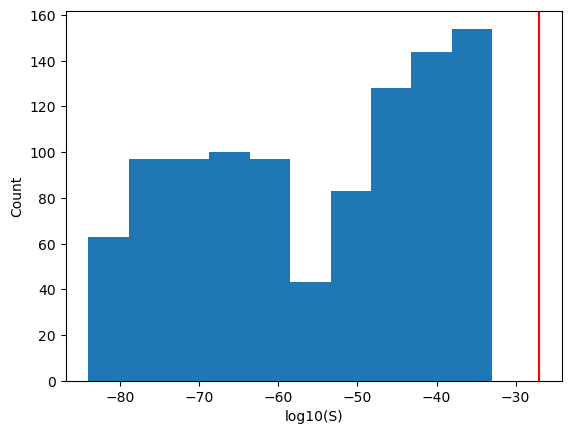

BAD LiF
LiF [2300, 2570] exomol
Using ExoMol database MoLLIST for 7Li-19F
Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/LiF/7Li-19F/7Li-19F__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\LiF\7Li-19F\MoLLIST\7Li-19F__MoLLIST.trans.bz2
.broad is used.
BAD LiF
HCN [1300, 1500] hitran
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             HCN
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state            

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.018 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.006 cm⁻¹. You can use wstep='auto' to get the optimal spectral grid value. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` or change the 'GRIDPOINTS_PER_LINEWIDTH_WARN_THRESHOLD' key of radis.config / your ~/radis.json (if you know what you're doing!)
  warnings.warn(WarningType(message))


0.31s - Spectrum calculated
H2O [5000, 5650] hitran
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             H2O
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          5650.0000 cm-1
   wavenum_min          5000.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\H2O.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True


C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.024 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.008 cm⁻¹. You can use wstep='auto' to get the optimal spectral grid value. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` or change the 'GRIDPOINTS_PER_LINEWIDTH_WARN_THRESHOLD' key of radis.config / your ~/radis.json (if you know what you're doing!)
  warnings.warn(WarningType(message))


0.26s - Spectrum calculated
H2O [6600, 7600] hitran
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             H2O
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          7600.0000 cm-1
   wavenum_min          6600.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\H2O.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True


C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.029 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0095 cm⁻¹. You can use wstep='auto' to get the optimal spectral grid value. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` or change the 'GRIDPOINTS_PER_LINEWIDTH_WARN_THRESHOLD' key of radis.config / your ~/radis.json (if you know what you're doing!)
  warnings.warn(WarningType(message))


0.40s - Spectrum calculated
MgH [1180, 1600] exomol
Using ExoMol database XAB for 24Mg-1H (recommended by the ExoMol team). All available databases are ['Yadin', 'UGAMOP', 'xsec-XAB', 'MoLLIST-MgH', 'XAB']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/MgH/24Mg-1H/24Mg-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/MgH/24Mg-1H/24Mg-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/MgH/24Mg-1H/24Mg-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\MgH\24Mg-1H\XAB\24Mg-1H__XAB.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
  

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


0.07s - Spectrum calculated
MgH [2600, 2900] exomol
Using ExoMol database XAB for 24Mg-1H (recommended by the ExoMol team). All available databases are ['Yadin', 'UGAMOP', 'xsec-XAB', 'MoLLIST-MgH', 'XAB']. Select one of them with `radis.fetch_exomol(DATABASE_NAME)`, `SpectrumFactory.fetch_databank('exomol', exomol_database=DATABASE_NAME')`, or `calc_spectrum(..., databank=('exomol', DATABASE_NAME))` 

Background atmosphere:  Air
Error: Couldn't download .broad file at http://www.exomol.com/db/MgH/24Mg-1H/24Mg-1H__H2.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/MgH/24Mg-1H/24Mg-1H__He.broad and save.
Error: Couldn't download .broad file at http://www.exomol.com/db/MgH/24Mg-1H/24Mg-1H__air.broad and save.
Reading C:\Users\luker\.radisdb\exomol\MgH\24Mg-1H\XAB\24Mg-1H__XAB.trans.bz2
.broad is used.
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
  

C:\Users\luker\Anaconda3\envs\Flaming_Radis\lib\site-packages\radis\misc\warning.py:369: MissingPressureShiftWarning: Pressure-shift coefficient not given in database: assumed 0 pressure shift
  warnings.warn(WarningType(message))


0.05s - Spectrum calculated
ClO [800, 880] hitran
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             ClO
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          880.0000 cm-1
   wavenum_min          800.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\ClO.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True
   m

0.07s - Spectrum calculated
SO2 [1070, 1400] hitran
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.0001
   molecule             SO2
   overpopulation       None
   path_length          500 cm
   pressure_mbar        1010.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          1400.0000 cm-1
   wavenum_min          1070.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   add_at_used          
   broadening_method    voigt
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               C:\Users\luker\.radisdb\hitran\SO2.hdf5
   diluent              air
   folding_thresh       1e-06
   include_neighbouring_lines  True


In [91]:
from pathlib import Path
Freq_obs = np.array(wv_obs)
folder = Path("Calibration/")
files = {f.name:f for f in sorted(folder.rglob("**/*_1ppm_*"))
        if int(f.name.split("_")[3].split(" ")[-1]) > 800}

def getReferenceMatrix(Compounds, T, P, W_obs):
    
    output = []
    
    for c in Compounds:
        
        bank = Compounds[c]['Source']
        
        tmp = np.zeros_like(W_obs)
        
        for i in range(len(Compounds[c]['bounds'])):
            bound = Compounds[c]['bounds'][i]
            try:
                print(c, bound, bank)
                s = calc_spectrum(bound[0], bound[1],         # cm-1
                          molecule=c,
                          isotope='1',
                          pressure=P,   # bar
                          Tgas=T,           # K
                          mole_fraction=10**(-4),
                          path_length=500,      # cm
                          databank=bank,  # or 'hitemp', 'geisa', 'exomol'
                          )
            except:
                print("BAD", c)
                continue
            s.apply_slit(0.241, 'cm-1', shape="gaussian")       # simulate an experimental slit
            w, A = s.get('absorbance', wunit='cm-1')
           
            iloc, jloc = np.argmin(np.abs(w.min() - W_obs)), np.argmin(np.abs(w.max() - W_obs))
            s.resample(W_obs[iloc:jloc], energy_threshold=2)
            
            w, A = s.get('absorbance', wunit='cm-1')

            tmp[iloc:jloc] = A
            
        output.append(tmp)
    
    ref_mat = np.array(output)
    
    return ref_mat

T, P = 300, 1.01

storage_mtx = getReferenceMatrix(Compounds, T, P, wv_obs)

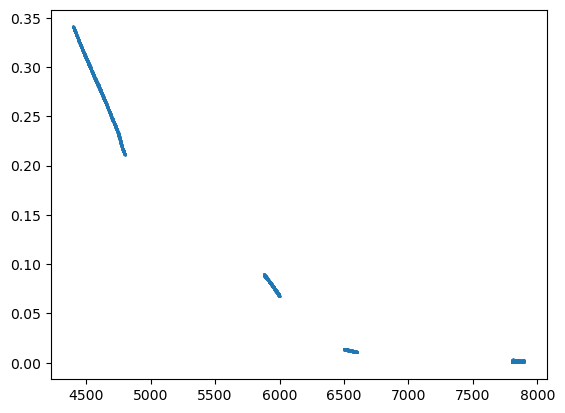

In [44]:
plt.scatter(wv_obs[np.all(storage_mtx == 0, axis=0)], spectra_obs[0][np.all(storage_mtx == 0, axis=0)],s=1)

In [107]:
def isNaN(num):
    return num != num

for i in range(len(storage_mtx)):
    for j in range(len(storage_mtx[i])):
        if isNaN(storage_mtx[i][j]):
            storage_mtx[i][j] = 0

In [46]:
S = np.array([s[~np.all(storage_mtx == 0, axis=0)] for s in spectra_obs])
S_l = np.array([np.log(x) for x in S])
W = wv_obs[~np.all(storage_mtx == 0, axis=0)]

C:\Users\luker\AppData\Local\Temp\ipykernel_4720\4110678604.py:2: RuntimeWarning: invalid value encountered in log
  S_l = np.array([np.log(x) for x in S])


In [10]:
Compounds.keys()

dict_keys(['C2H2', 'H2CO', 'NO2', 'SiH', 'CaF', 'SiS', 'CH3Br', 'CO', 'H2S', 'BeH', 'HF', 'NO', 'HCl', 'NH', 'SiH2', 'AlF', 'SH', 'CH', 'CO2', 'C2H6', 'HCOOH', 'AlH', 'N2O', 'TiH', 'COF2', 'CaH', 'LiF', 'HCN', 'H2O', 'MgH', 'ClO', 'CH4', 'C2H4', 'SO2', 'CH3OH'])

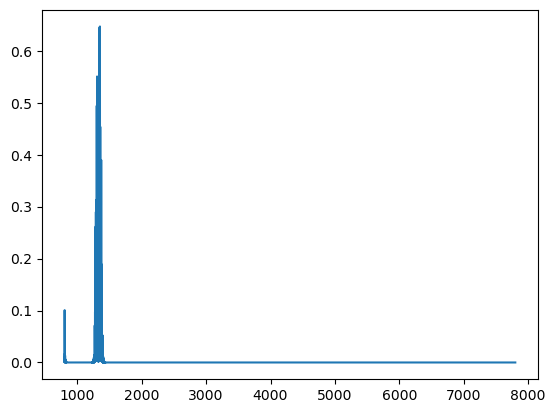

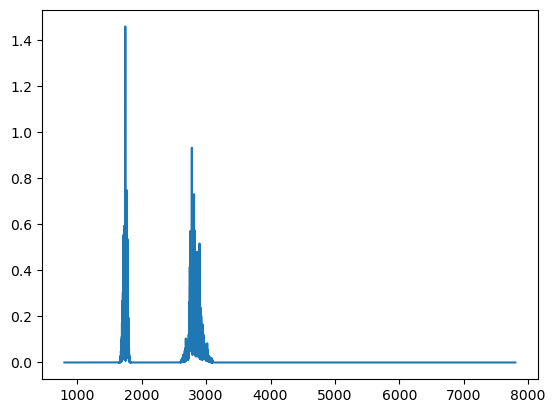

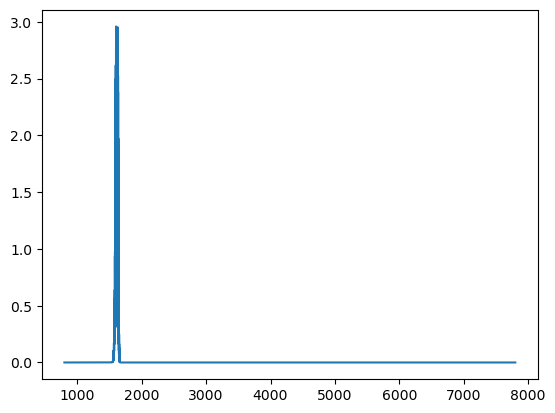

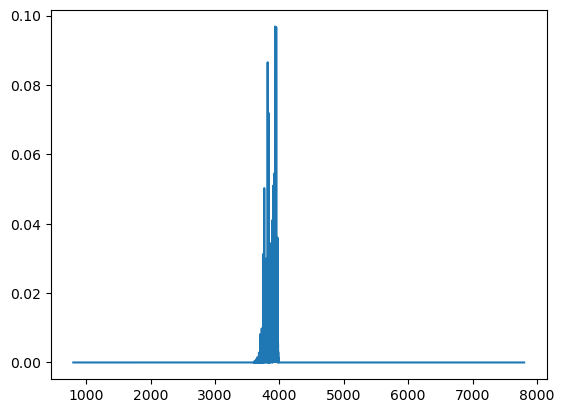

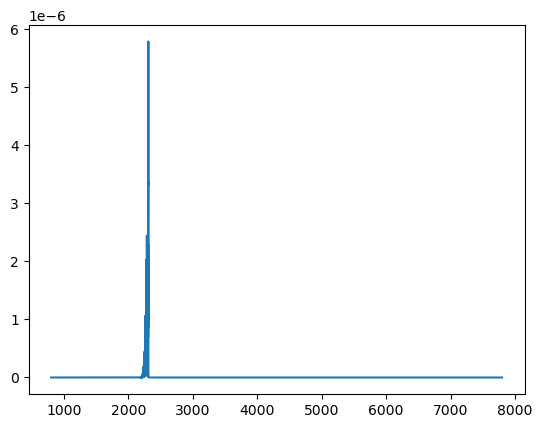

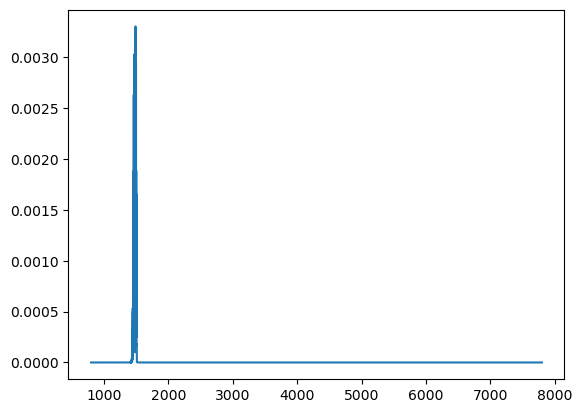

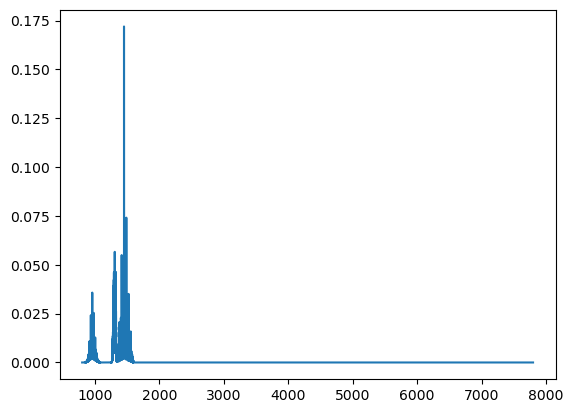

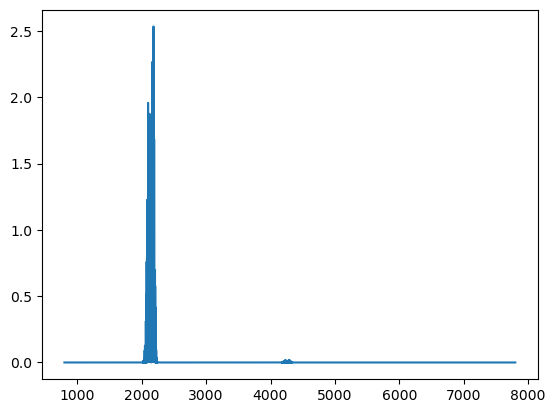

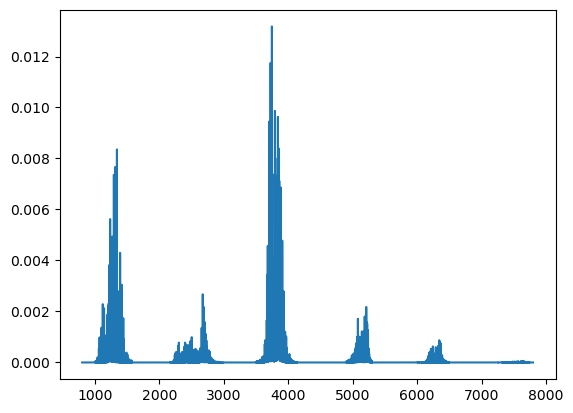

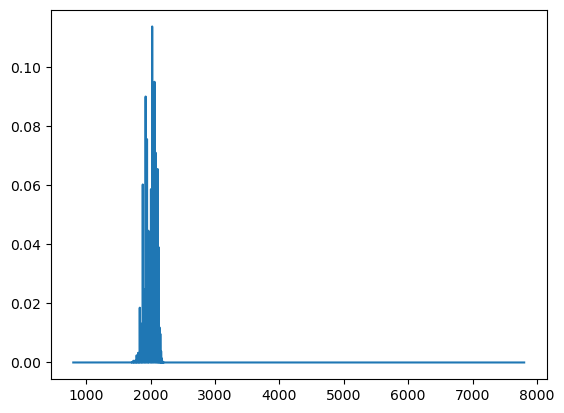

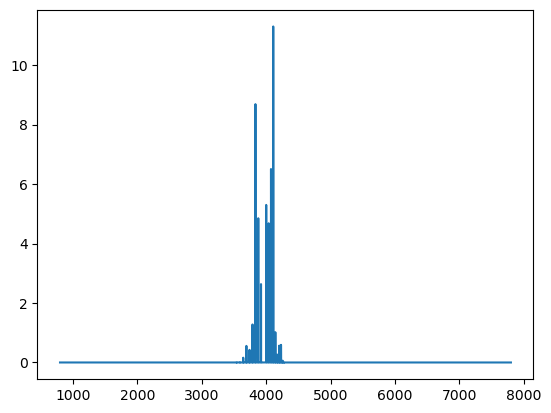

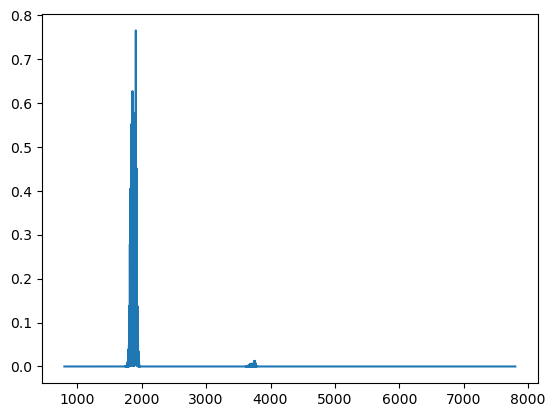

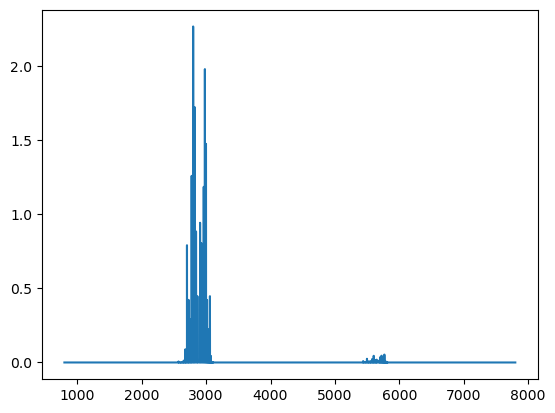

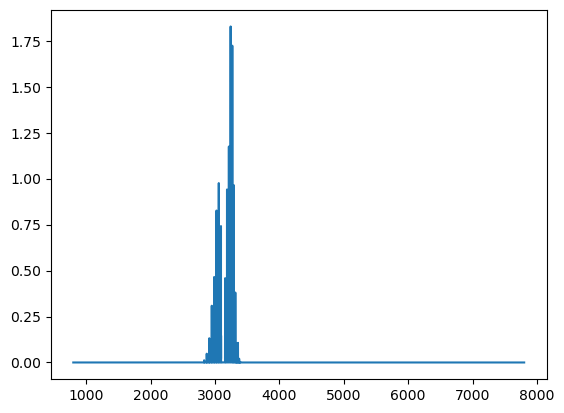

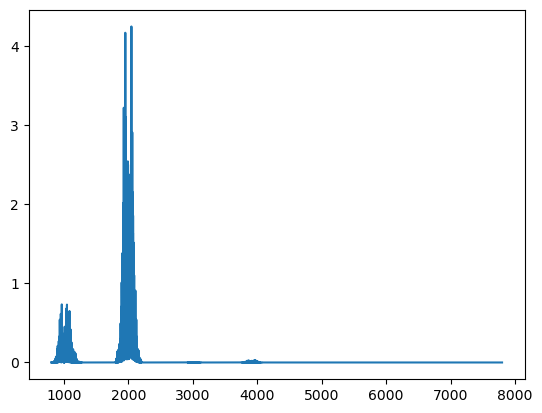

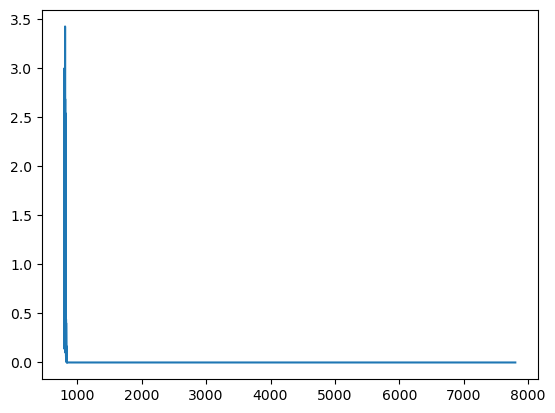

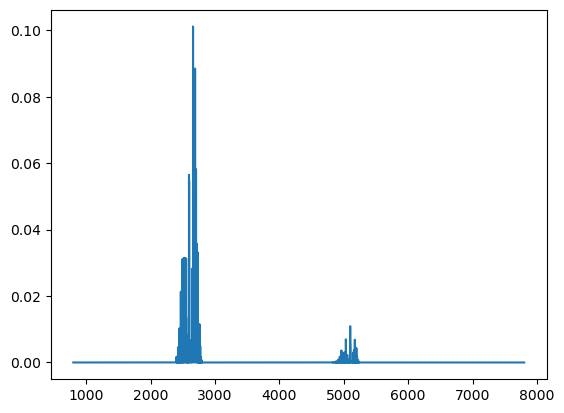

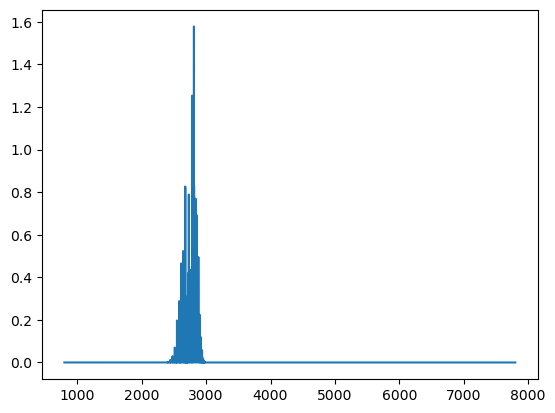

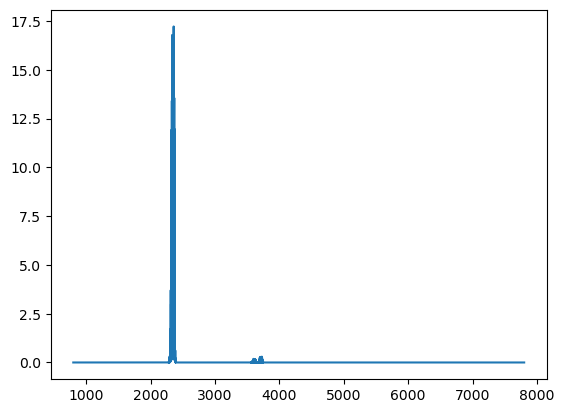

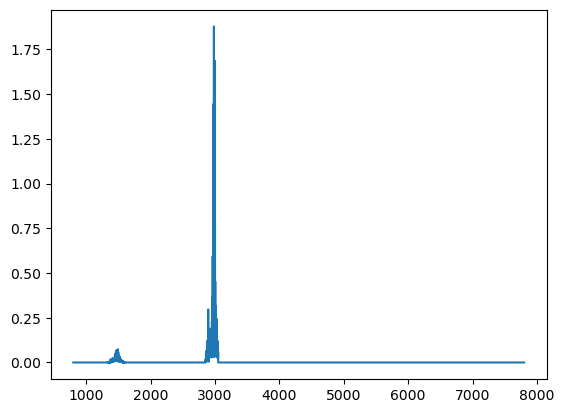

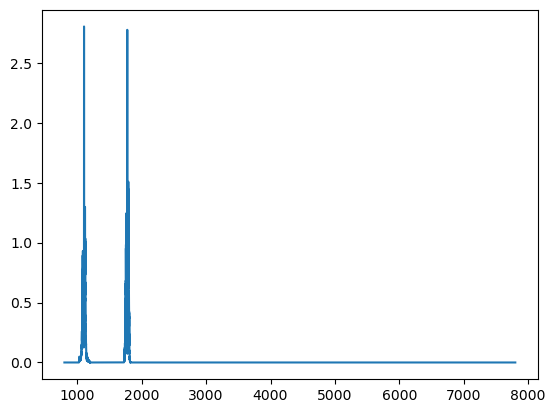

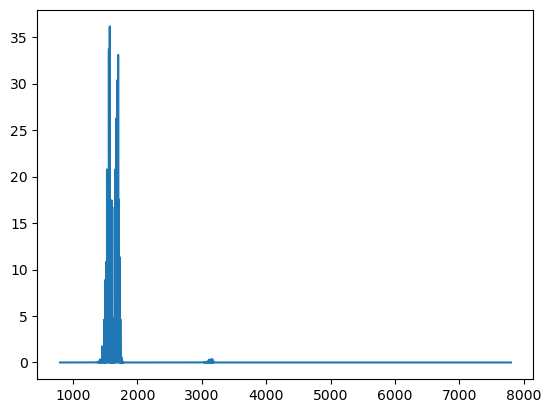

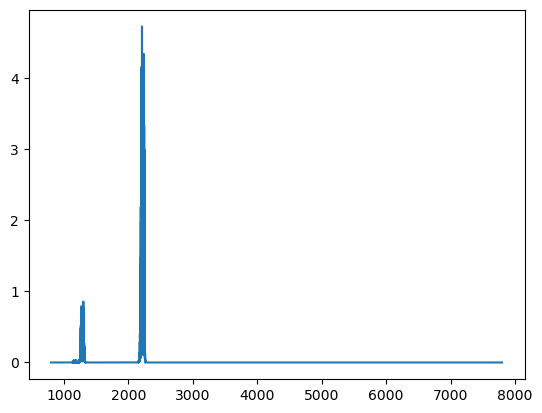

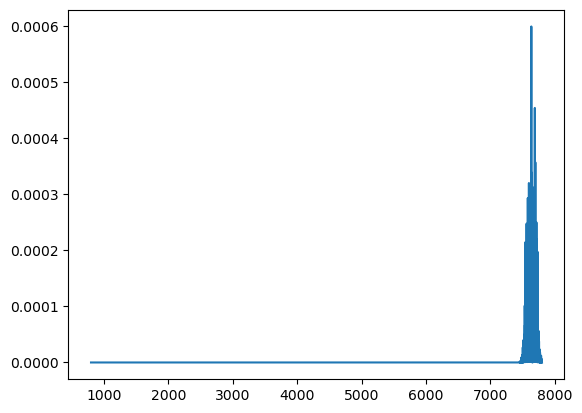

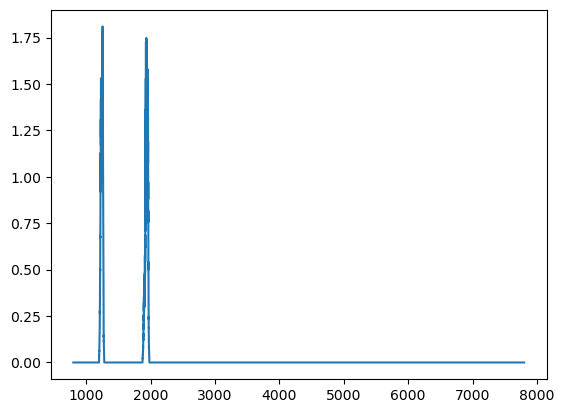

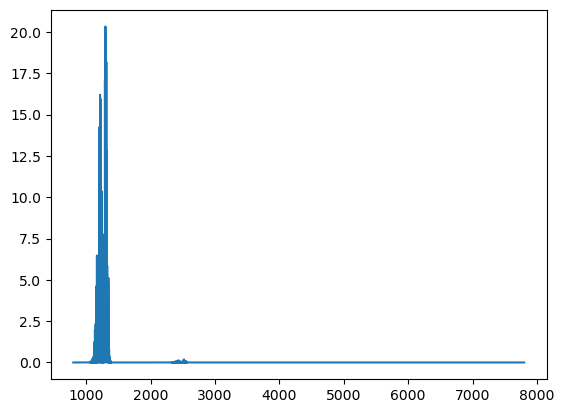

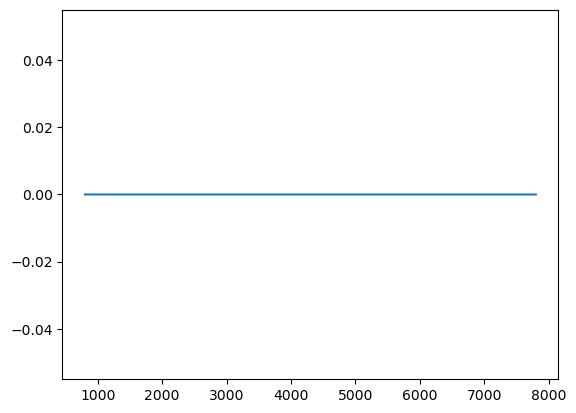

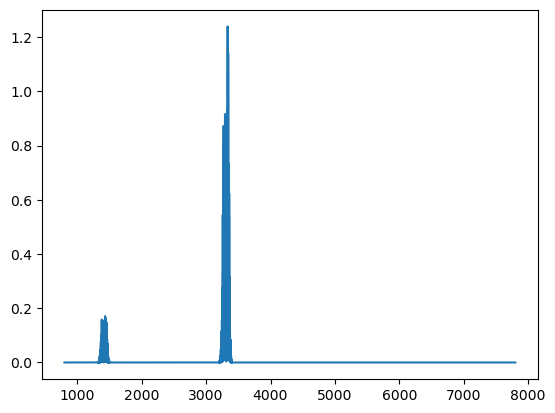

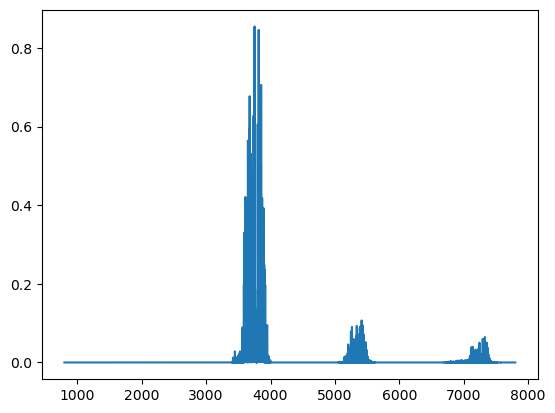

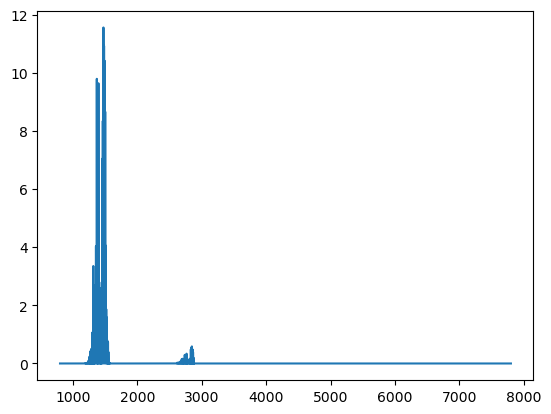

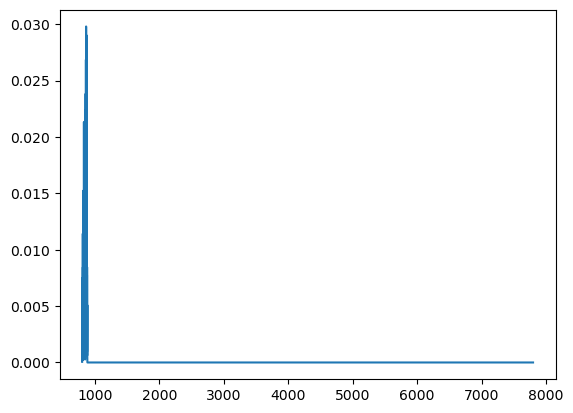

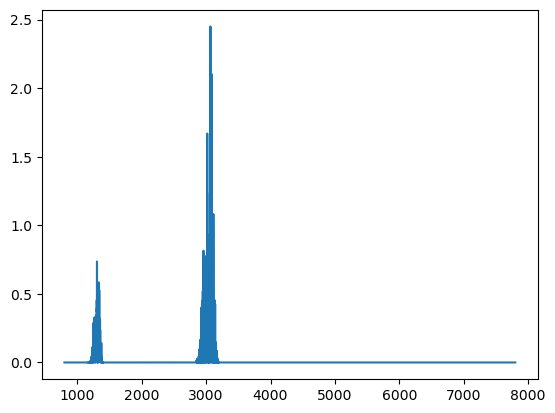

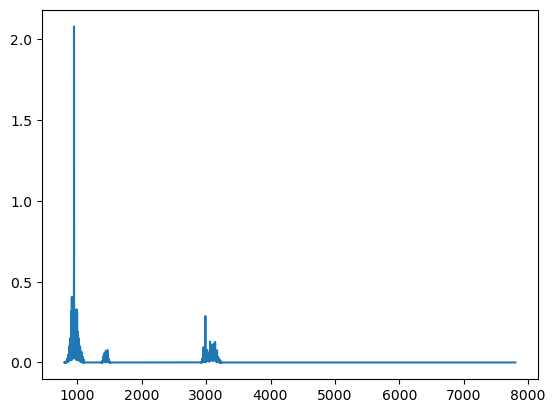

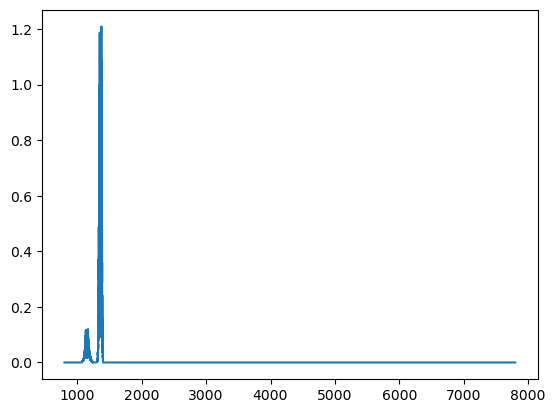

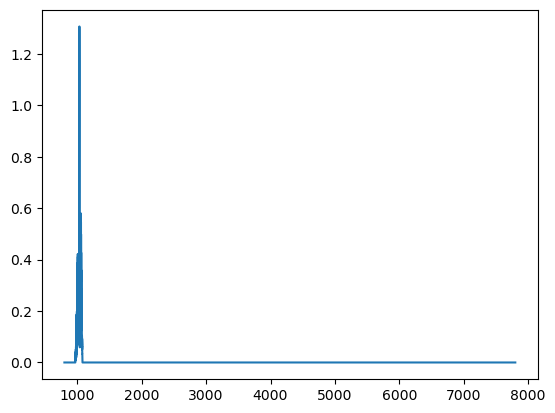

In [55]:
for i in range(len(storage_mtx)):
    plt.plot(W, storage_mtx[i])
    plt.show()

C:\Users\luker\AppData\Local\Temp\ipykernel_4720\2362447228.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(W[x]) for x in [-500, 0,5000,10000,15000,20000,25000]], fontsize=14)


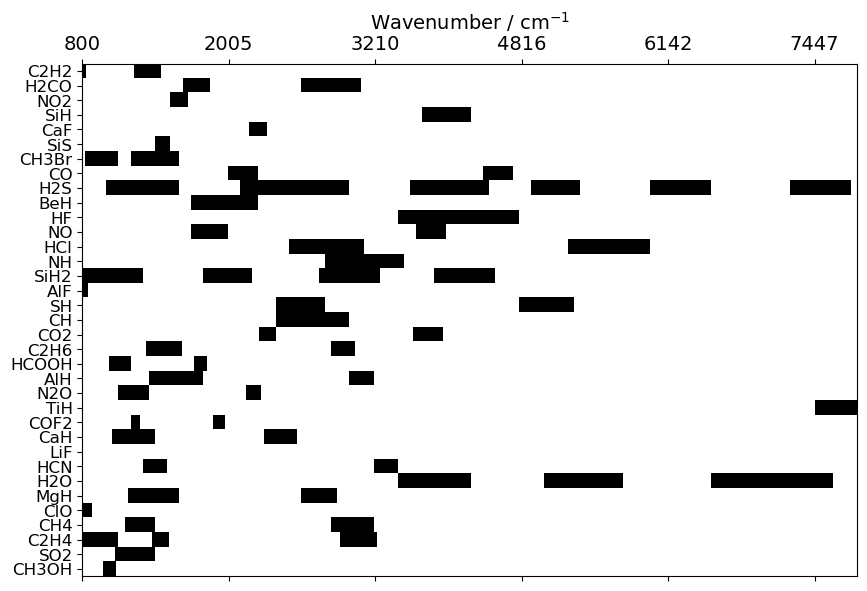

Text(0.5, 0, 'Wavenumber / cm$^{-1}$')

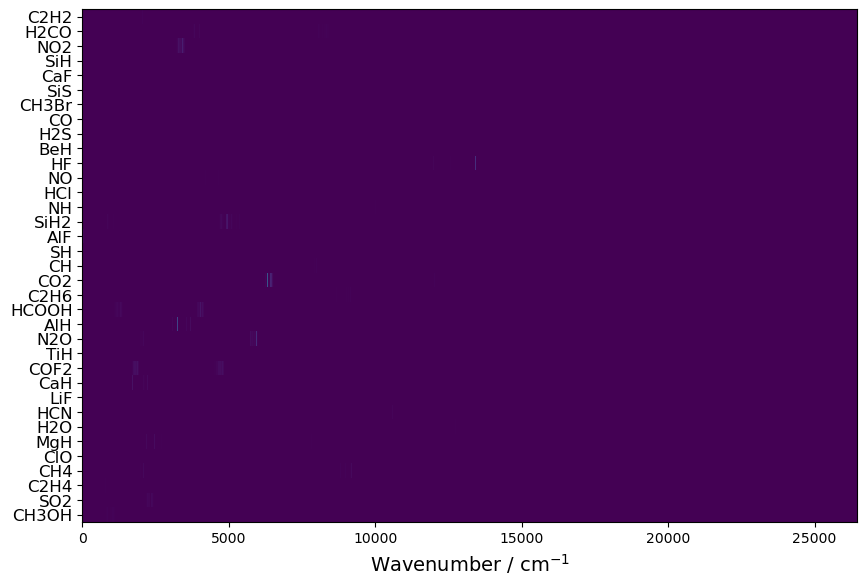

In [47]:
storage_mtx = storage_mtx[:,~np.all(storage_mtx == 0, axis=0)]

fig, ax = plt.subplots(figsize=(10,10))

fig.canvas.draw()

ax.spy(storage_mtx, aspect = 1/0.002)

ax.set_yticks(np.arange(0,len(storage_mtx),1))
ax.set_yticklabels(Compounds.keys(), fontsize=12)
ax.set_xticklabels([int(W[x]) for x in [-500, 0,5000,10000,15000,20000,25000]], fontsize=14)

ax.set_xlabel('Wavenumber / cm$^{-1}$', fontsize=14)
ax.xaxis.set_label_position('top') 

plt.show()
import scipy.sparse as sprs
fig, ax = plt.subplots(figsize=(10,10))

storage_mtx_SM = sprs.csr_matrix(storage_mtx)

cmap = matplotlib.cm.viridis  # Can be any colormap that you want after the cm

d= storage_mtx_SM.todense()
ax.imshow(d,interpolation='none',cmap=cmap, aspect = 1/0.002)

ax.set_yticks(np.arange(0,len(storage_mtx),1))
ax.set_yticklabels(Compounds.keys(), fontsize=12)
#[x for x in Compounds.keys()]
#ax.set_yticklabels(labels_new, fontsize=14)
#ax.set_xticklabels([int(W[x]) for x in [-500, 0,500,1000,1500,2000,2500,3000,3500, len(W)-1]], fontsize=14)

ax.set_xlabel('Wavenumber / cm$^{-1}$', fontsize=14)

In [117]:
np.save('storage_mtx',storage_mtx)

In [48]:
# Note that the remove_background still take bounds_clip as input. This doesn't do anything, I will get round to removing soon.

# Simple background removal and subsetting.
residual_spectra = remove_background(S_l, {}, W)
# Subsetting of the absorption spectra.

reference_spectra = storage_mtx[:, ~np.all(storage_mtx == 0, axis=0)]

# One by one inversion

This is how you invert individual timesteps (or individual spectra for that matter).

Shown for the two first time steps and timesteps 300 and 350

In [54]:
for tstep in [0, 1, 300, 350]:
    x_sol = np.linalg.lstsq(reference_spectra.T, residual_spectra[tstep, :], rcond=None)
    print(tstep, "=>", x_sol[0])

LinAlgError: SVD did not converge in Linear Least Squares

# Regularised inversion

Now for the regularised inversion. This also returns uncertainty (not complete, as I don't really know what the observational error in the data is). Note that the function returns the variance of the posterior distribution, so we need to take the square root. Here I plot the maximum a posteriori and $\pm \sigma/2$, for good measure.



In [50]:
gamma_selection = np.loadtxt("gamma_selection.csv")[:-1]

In [68]:
x_sol,sigma, C = temporally_regularised_inversion(reference_spectra, residual_spectra,
                                                  0.001)

KeyboardInterrupt: 

In [109]:
cond_stor = np.array([storage_mtx[7], storage_mtx[18], storage_mtx[28], storage_mtx[31]])

In [112]:
print(cond_stor)
for i in range(len(cond_stor)):
    for j in range(len(cond_stor[i])):
        if isNaN(cond_stor[i][j]):
            cond_stor[i][j] = 0
            
print(cond_stor)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.75800849e-06
  2.35089454e-05 1.89566143e-06]
 [9.92322072e-06 1.53023177e-05 2.46777967e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.75800849e-06
  2.35089454e-05 1.89566143e-06]
 [9.92322072e-06 1.53023177e-05 2.46777967e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [111]:
S = np.array([s[~np.all(cond_stor == 0, axis=0)] for s in spectra_obs])
S_l = np.array([np.log(x) for x in S])
W = wv_obs[~np.all(cond_stor == 0, axis=0)]

cond_stor = cond_stor[:, ~np.all(cond_stor == 0, axis=0)]

C:\Users\luker\AppData\Local\Temp\ipykernel_4720\3364060421.py:2: RuntimeWarning: invalid value encountered in log
  S_l = np.array([np.log(x) for x in S])


In [113]:
residual_spectra = remove_background(S_l, {}, W)

reference_spectra = cond_stor

In [114]:
for tstep in [0, 1, 300, 350]:
    x_sol = np.linalg.lstsq(reference_spectra.T, residual_spectra[tstep, :], rcond=None)
    print(tstep, "=>", x_sol[0])

LinAlgError: SVD did not converge in Linear Least Squares

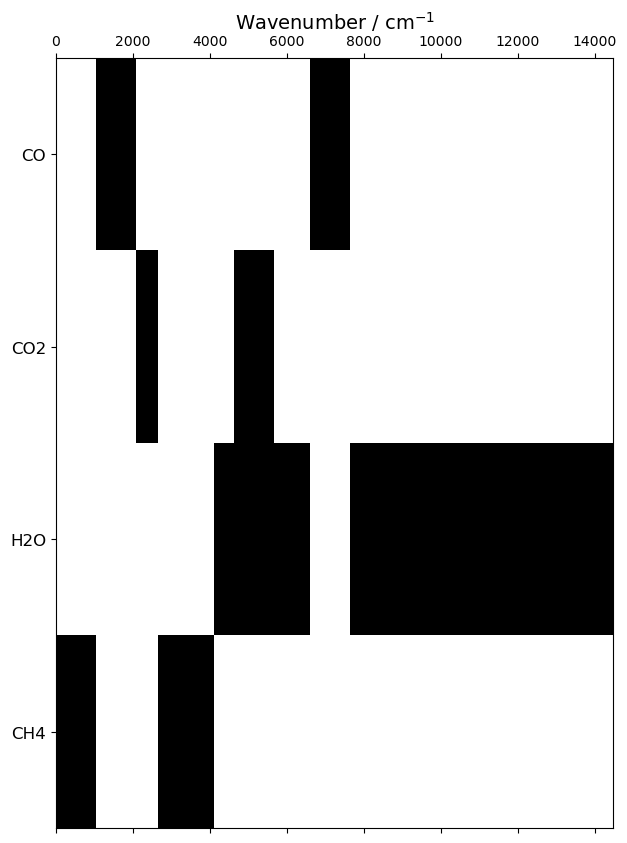

Text(0.5, 0, 'Wavenumber / cm$^{-1}$')

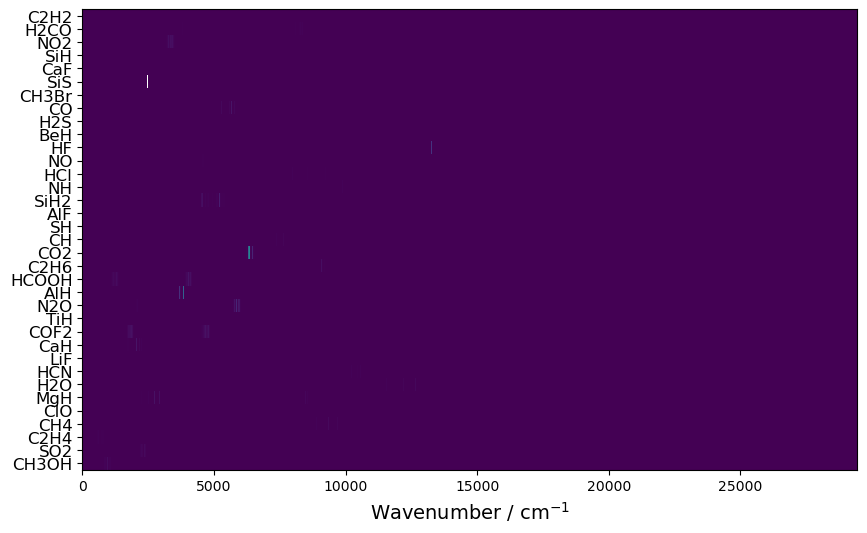

In [104]:
fig, ax = plt.subplots(figsize=(10,10))

fig.canvas.draw()

ax.spy(cond_stor, aspect = 1/0.0002)

ax.set_yticks(np.arange(0,len(cond_stor),1))
ax.set_yticklabels(['CO', 'CO2', 'H2O', 'CH4'], fontsize=12)
#ax.set_xticklabels([int(W[x]) for x in [-500, 0,5000,10000,15000,20000,25000]], fontsize=14)

ax.set_xlabel('Wavenumber / cm$^{-1}$', fontsize=14)
ax.xaxis.set_label_position('top') 

plt.show()
import scipy.sparse as sprs
fig, ax = plt.subplots(figsize=(10,10))

storage_mtx_SM = sprs.csr_matrix(storage_mtx)

cmap = matplotlib.cm.viridis  # Can be any colormap that you want after the cm

d= storage_mtx_SM.todense()
ax.imshow(d,interpolation='none',cmap=cmap, aspect = 1/0.002)

ax.set_yticks(np.arange(0,len(storage_mtx),1))
ax.set_yticklabels(Compounds.keys(), fontsize=12)
#[x for x in Compounds.keys()]
#ax.set_yticklabels(labels_new, fontsize=14)
#ax.set_xticklabels([int(W[x]) for x in [-500, 0,500,1000,1500,2000,2500,3000,3500, len(W)-1]], fontsize=14)

ax.set_xlabel('Wavenumber / cm$^{-1}$', fontsize=14)

In [44]:
import colorsys

def HSVToRGB(h, s, v): 
    (r, g, b) = colorsys.hsv_to_rgb(h, s, v) 
    return (int(255*r), int(255*g), int(255*b)) 

def getDistinctColors(n): 
    huePartition = 1.0 / (n + 1) 
    return (HSVToRGB(huePartition * value, 1.0, 1.0) for value in range(0, n))

def rgb2hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(rgb[0],rgb[1],rgb[2])

def hilo(a, b, c):
    if c < b: b, c = c, b
    if b < a: a, b = b, a
    if c < b: b, c = c, b
    return a + c

def complement(col):
    r, g, b = col[0], col[1], col[2]
    k = hilo(r, g, b)
    return tuple(k - u for u in (r, g, b))

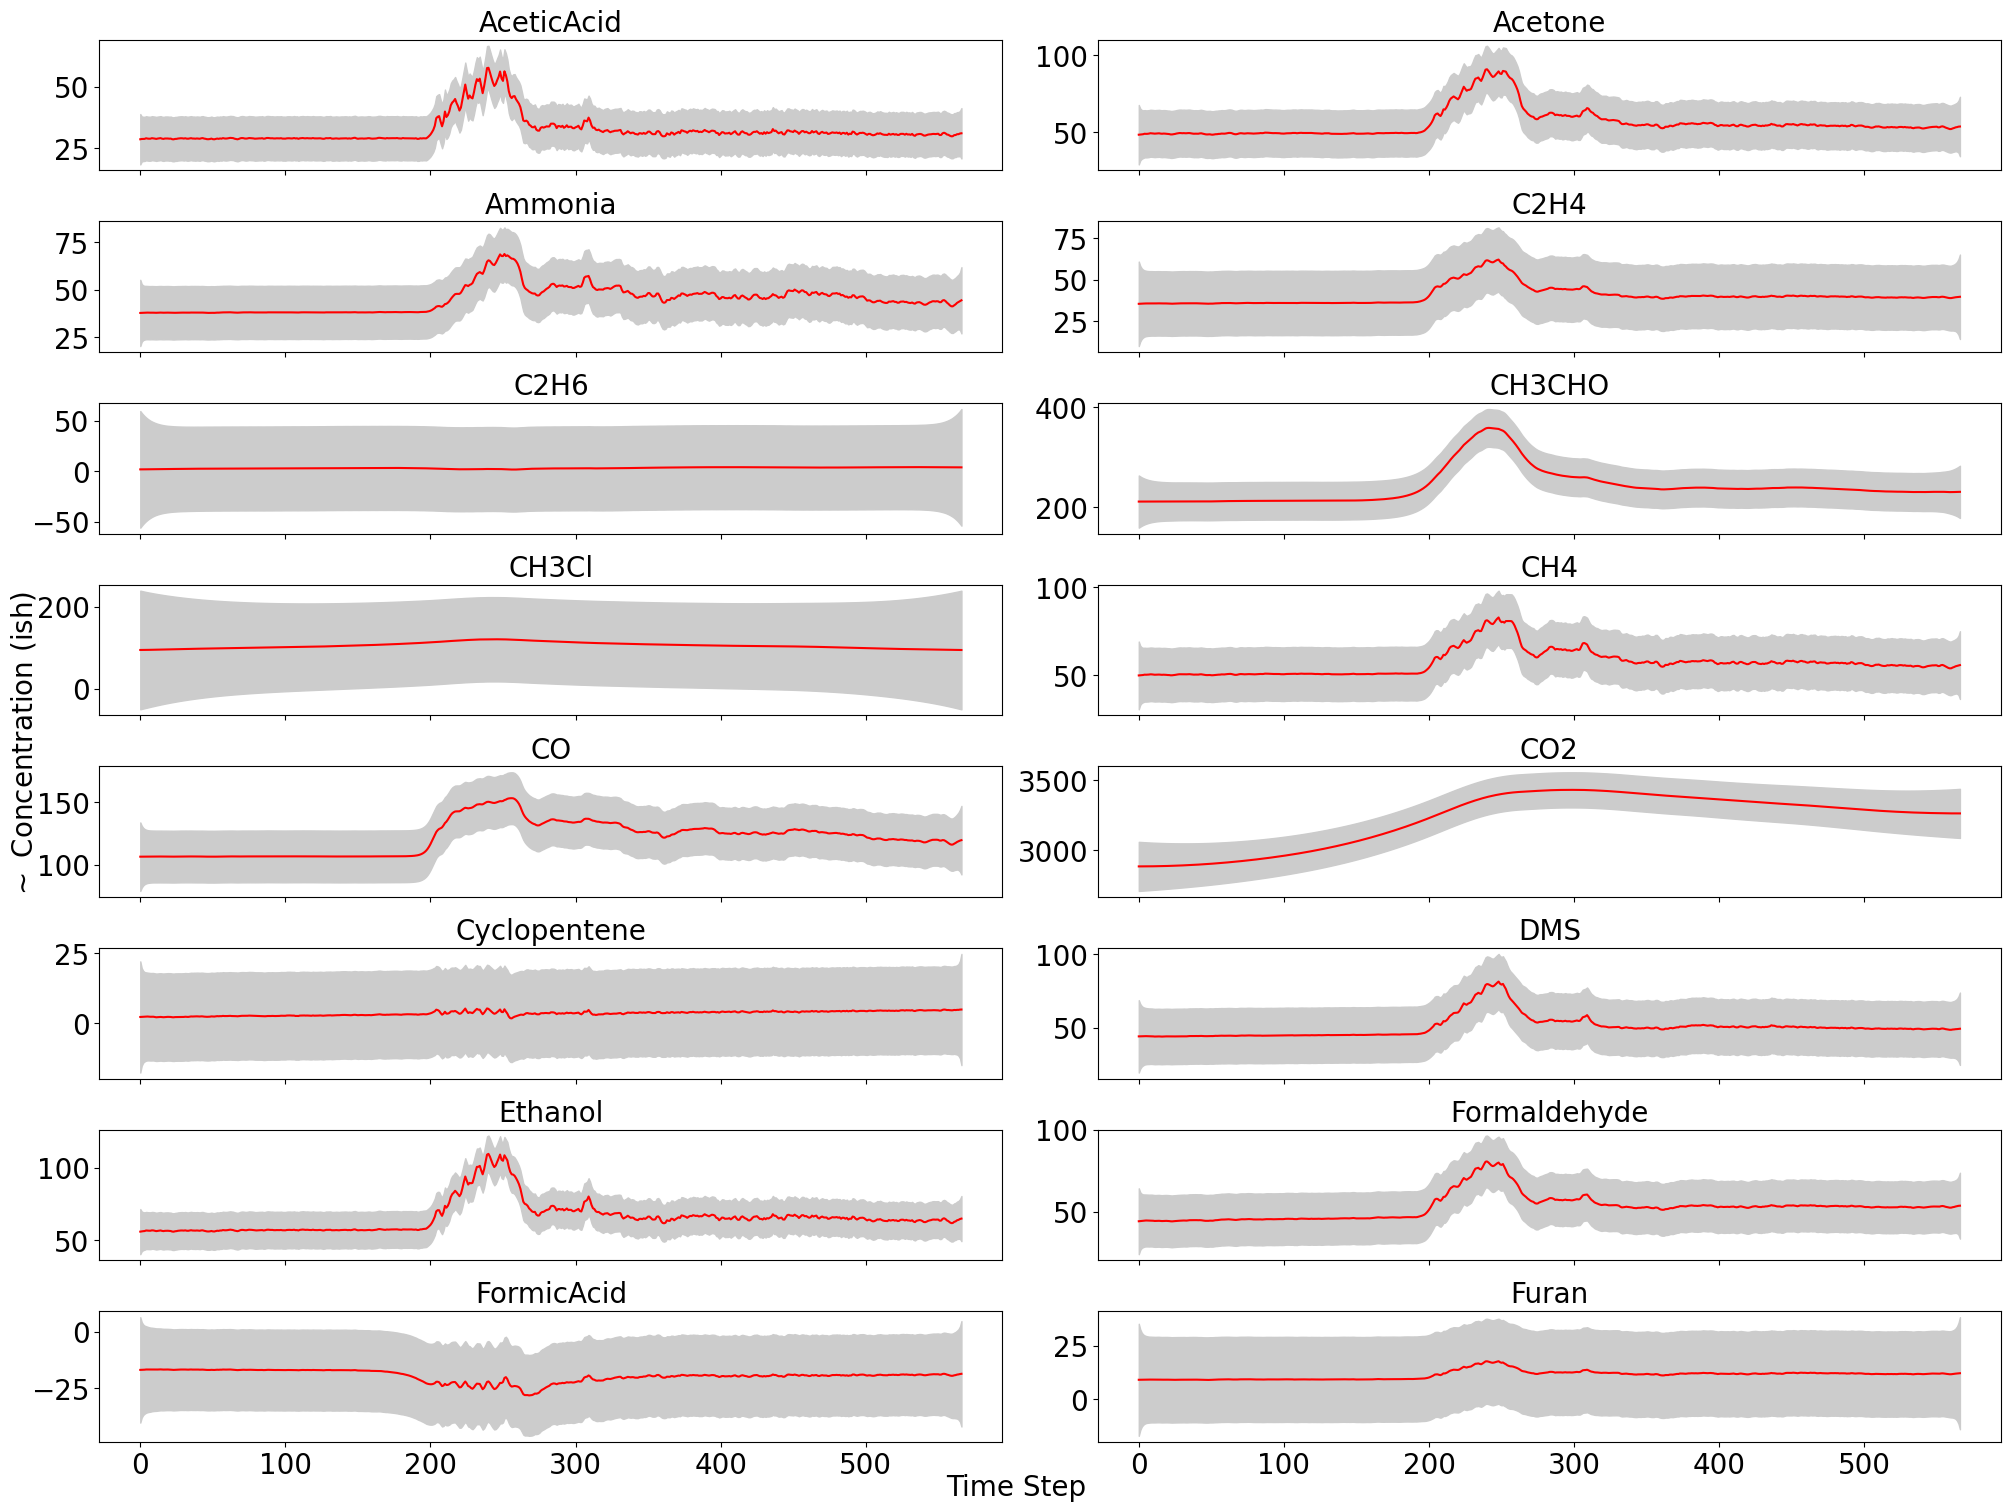

In [45]:
fig, axs = plt.subplots(nrows=8, ncols=2, figsize= (20,15),sharex=True)
axs = axs.flatten()
nt = residual_spectra.shape[0]
colours = getDistinctColors(len(labels_new))

for i, spc in enumerate(labels_new):
    try:
        col = next(colours)
        c = rgb2hex(col)
        c_comp = rgb2hex(complement(col))
        axs[i].plot(np.arange(nt), new_sol[i*nt:(i+1)*nt], color = 'red')
        axs[i].fill_between(np.arange(nt), new_sol[i*nt:(i+1)*nt] - 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]),
                            new_sol[i*nt:(i+1)*nt] + 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]),
                            color= "0.8")
        axs[i].set_title(spc, fontsize=20)
        axs[i].tick_params(labelsize=20)
    except:
        continue

fig.text(0.5, -0.001, 'Time Step', ha='center', fontsize=20)
fig.text(-0.003, 0.5, '$\sim$ Concentration (ish)', va='center', rotation='vertical', fontsize=20)

fig.tight_layout()

In [46]:
x_sol,sigma, C = temporally_regularised_inversion2(reference_spectra, residual_spectra,
                                                  gamma_selection)

In [47]:
new_sol = ConvertToConc(x_sol, cal, nt)

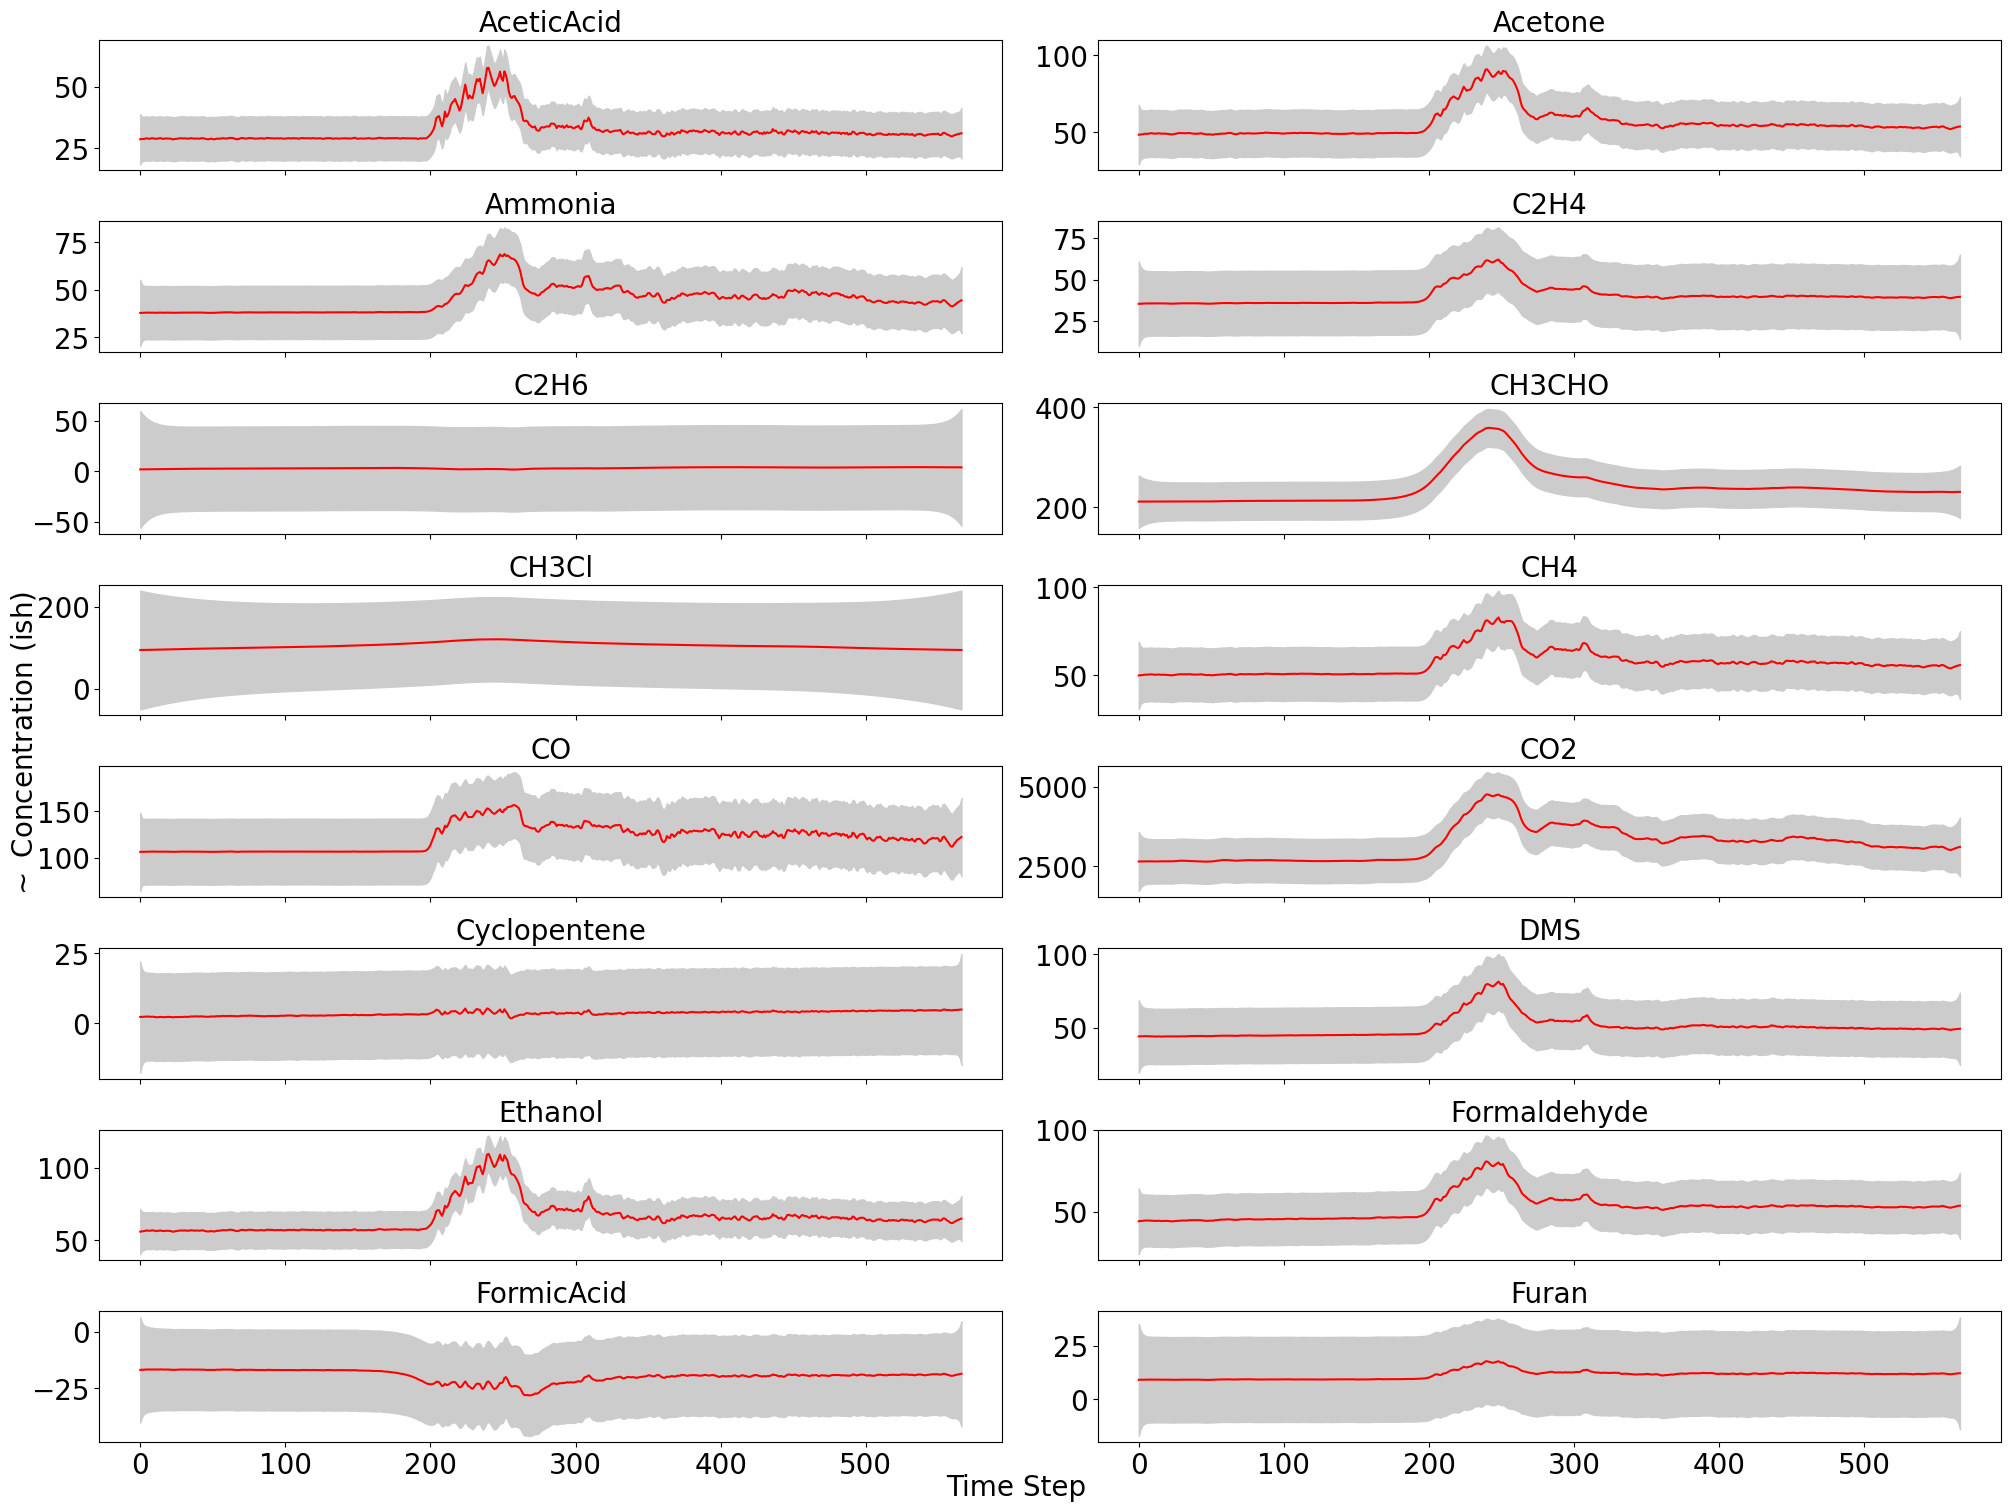

In [48]:
fig, axs = plt.subplots(nrows=8, ncols=2, figsize= (20,15),sharex=True)
axs = axs.flatten()
nt = residual_spectra.shape[0]
colours = getDistinctColors(len(labels_new))

for i, spc in enumerate(labels_new):
    try:
        col = next(colours)
        c = rgb2hex(col)
        c_comp = rgb2hex(complement(col))
        axs[i].plot(np.arange(nt), new_sol[i*nt:(i+1)*nt], color = 'red')
        axs[i].fill_between(np.arange(nt), new_sol[i*nt:(i+1)*nt] - 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]),
                            new_sol[i*nt:(i+1)*nt] + 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]),
                            color= "0.8")
        axs[i].set_title(spc, fontsize=20)
        axs[i].tick_params(labelsize=20)
    except:
        continue

fig.text(0.5, -0.001, 'Time Step', ha='center', fontsize=20)
fig.text(-0.003, 0.5, '$\sim$ Concentration (ish)', va='center', rotation='vertical', fontsize=20)

fig.tight_layout()

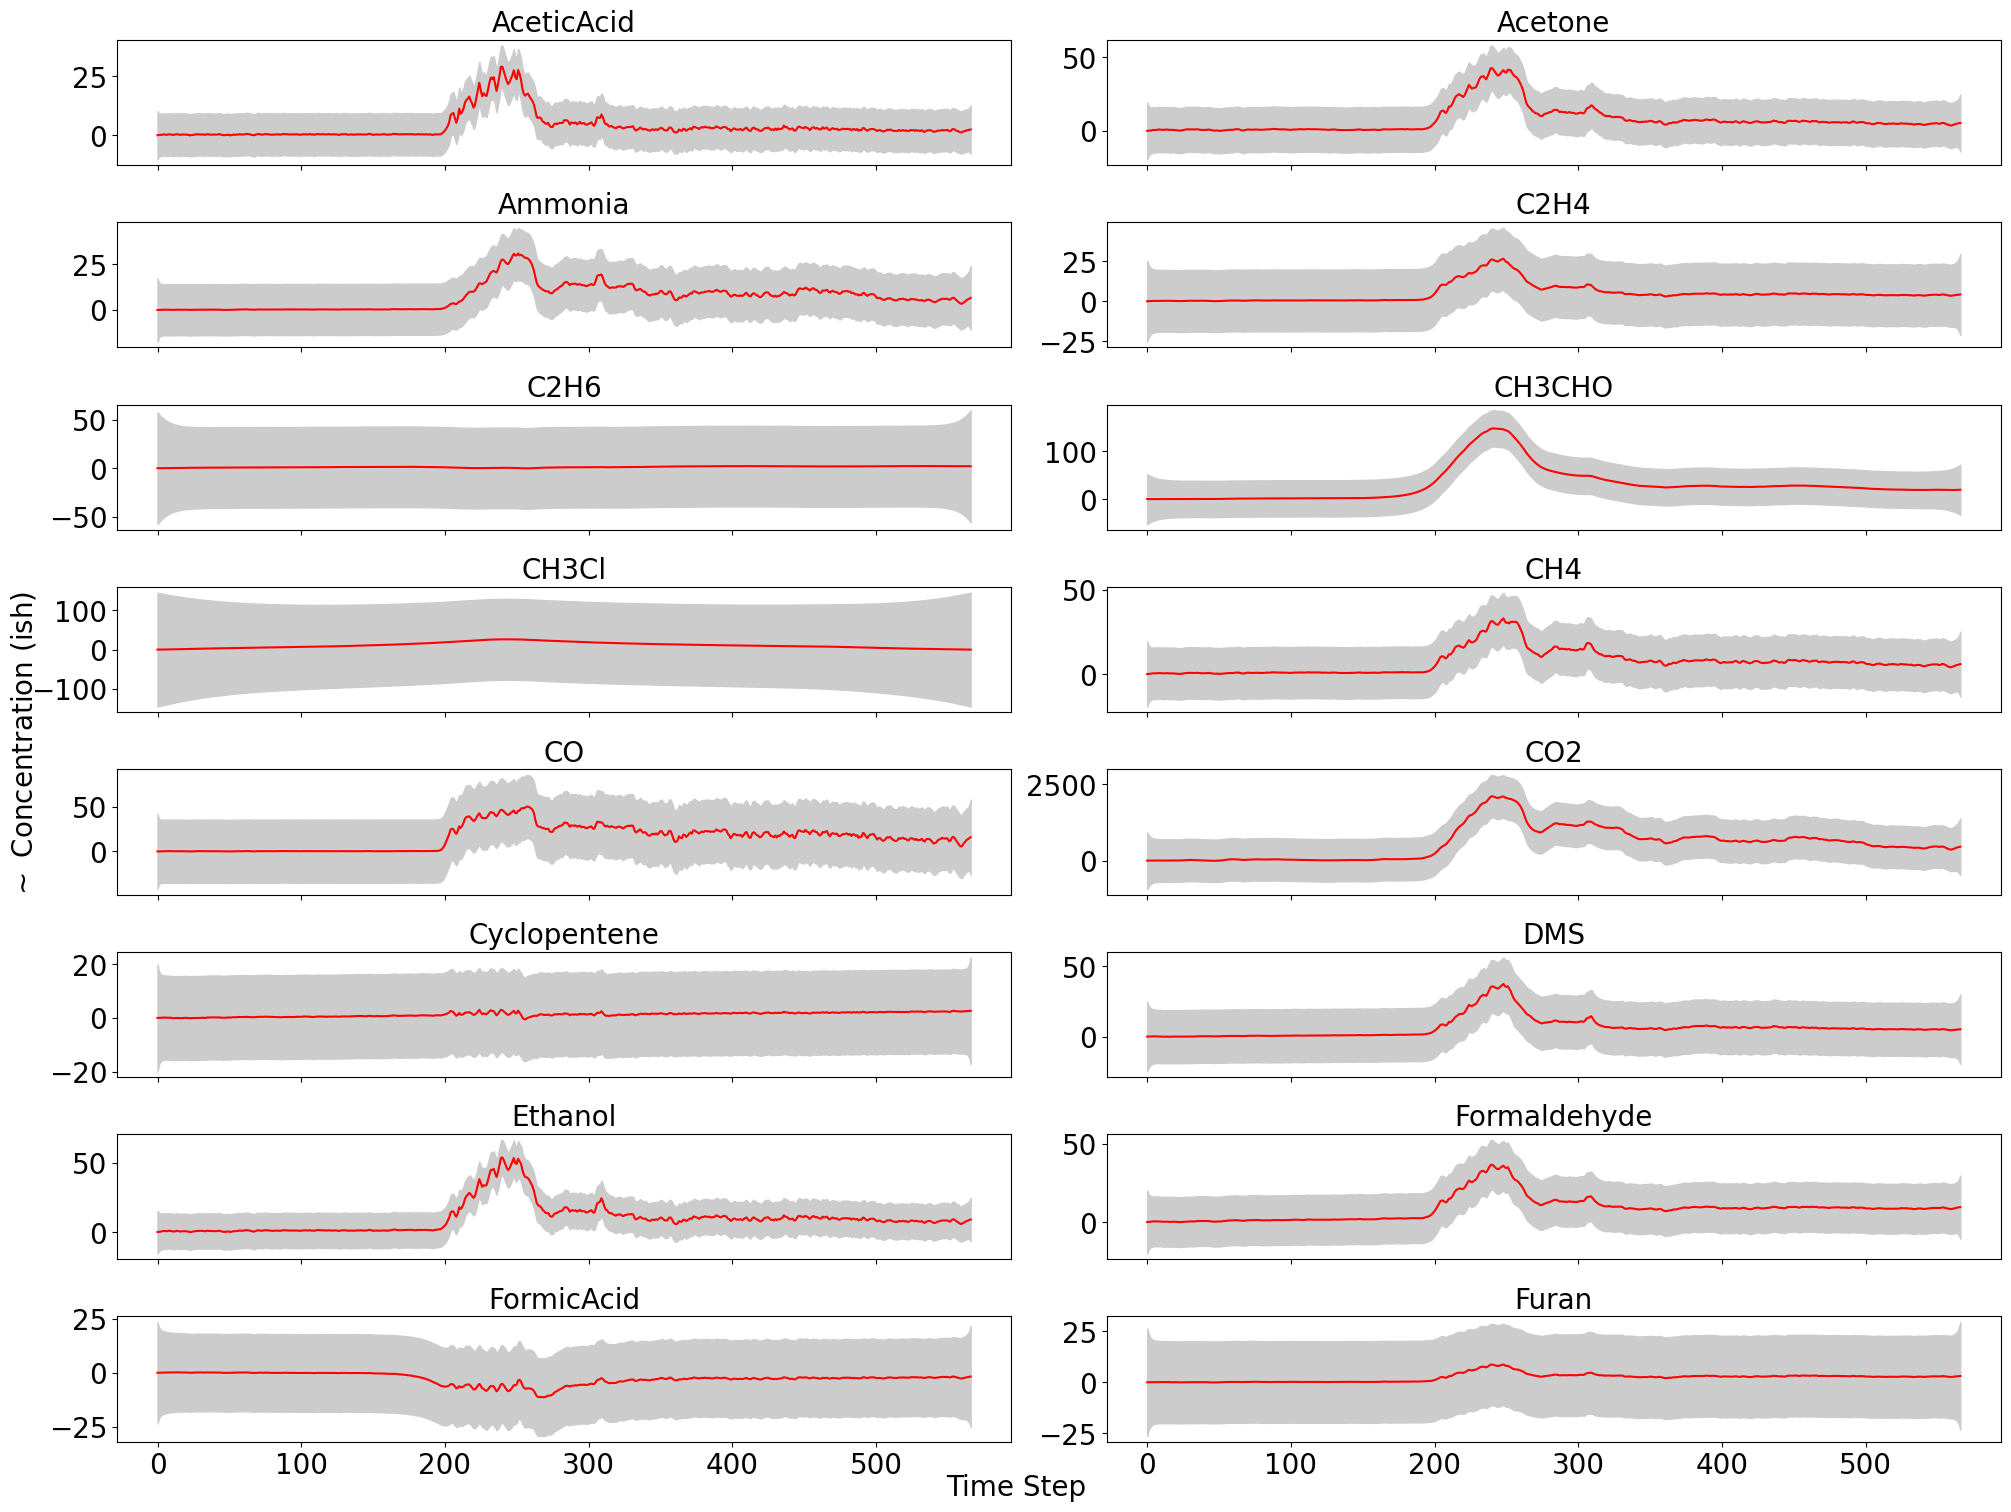

In [49]:
fig, axs = plt.subplots(nrows=8, ncols=2, figsize= (20,15),sharex=True)
axs = axs.flatten()
nt = residual_spectra.shape[0]
colours = getDistinctColors(len(labels_new))

for i, spc in enumerate(labels_new):
    try:
        col = next(colours)
        c = rgb2hex(col)
        c_comp = rgb2hex(complement(col))
        arr = [x-new_sol[i*nt:(i+1)*nt][0] for x in new_sol[i*nt:(i+1)*nt]]
        axs[i].plot(np.arange(nt), arr, color = 'red')
        axs[i].fill_between(np.arange(nt), arr - 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]),
                            arr + 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]),
                            color= "0.8")
        axs[i].set_title(spc, fontsize=20)
        axs[i].tick_params(labelsize=20)
    except:
        continue

fig.text(0.5, -0.001, 'Time Step', ha='center', fontsize=20)
fig.text(-0.003, 0.5, '$\sim$ Concentration (ish)', va='center', rotation='vertical', fontsize=20)

fig.tight_layout()

Code below trials the model over N $\gamma$ values and optimises values. These values are loaded earlier for actual use

In [ ]:
def Euclidean_Norm(arr):
    t = 0
    for x in arr:
        t += x**2
    return np.sqrt(t)

Gam_Range = np.logspace(-8, 2.5, num=200)

In [ ]:
# Resid_norm = []
# Soln_norm = []

# for gamma in Gam_Range:
#     x_sol,sigma, C = temporally_regularised_inversion(reference_spectra, residual_spectra, gamma)
    
#     for i in range(len(labels_new)):
#         sol = x_sol[i*nt:(i+1)*nt]
#         resid = np.sqrt(sigma[i*nt:(i+1)*nt])
        
#         if len(Resid_norm) < len(labels_new):
#             Resid_norm.append([])
#             Soln_norm.append([])
        
#         Resid_norm[i].append(Euclidean_Norm(resid))
#         Soln_norm[i].append(Euclidean_Norm(sol))

# np.savetxt("Resid_Norms3.csv", Resid_norm, delimiter=",")
# np.savetxt("Soln_Norms3.csv", Soln_norm, delimiter=",")

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [ ]:
viridis = cm.get_cmap('viridis', 12)
norm = mpl.colors.Normalize(vmin=np.log10(Gam_Range).min(), vmax=np.log10(Gam_Range).max())

for i in range(len(Resid_norm)):
    
    fig, ax = plt.subplots()
    
    for x in range(len(Resid_norm[i])):
        ax.scatter(Resid_norm[i][x], Soln_norm[i][x], color = viridis(norm(np.log10(Gam_Range[x]))))
    #plt.xscale('log')
    ax.set_title(labels_new[i], fontsize=15)
    ax.set_xlabel('$\\vert$$\\vert$Residual$\\vert$$\\vert_2$', fontsize=15)
    ax.set_ylabel('$\\vert$$\\vert$Solution$\\vert$$\\vert_2$', fontsize=15)
    ax.tick_params(labelsize=15)
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=viridis), ax=ax)
    cbar.ax.set_yticklabels(['10$^{-8}$', '10$^{-6}$', '$10^{-4}$', '$10^{-2}$', '$1$', '$10^{2}$'], fontsize=15)
    cbar.ax.set_ylabel('$\gamma$', rotation=0, fontsize=15)
    plt.show()

In [ ]:
for i in range(len(Resid_norm)):
    
    fig, ax = plt.subplots()
    
    for x in range(len(Resid_norm[i])):
        ax.scatter(Resid_norm[i][x], np.gradient(Soln_norm[i])[x], color = viridis(norm(np.log10(Gam_Range[x]))))
    #plt.xscale('log')
    ax.set_title(labels_new[i], fontsize=15)
    ax.set_xlabel('$\\vert$$\\vert$Residual$\\vert$$\\vert_2$', fontsize=15)
    ax.set_ylabel('Grad($\\vert$$\\vert$Solution$\\vert$$\\vert_2$)', fontsize=15)
    ax.tick_params(labelsize=15)
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=viridis), ax=ax)
    cbar.ax.set_yticklabels(['10$^{-8}$', '10$^{-6}$', '$10^{-4}$', '$10^{-2}$', '$1$', '$10^{2}$'], fontsize=15)
    cbar.ax.set_ylabel('$\gamma$', rotation = 0, fontsize=15)
    plt.show()

In [ ]:
gamma_selection = []

for x in Soln_norm:
    index = np.where(abs(np.gradient(x)) == max(abs(np.gradient(x))))
    gamma_selection.append(Gam_Range[index][0])
    

Below will be loading up results from OPUS GA for comparison

In [53]:
import pandas as pd
df = pd.read_csv('spectra/OPUS_results.txt', sep='\t')

In [54]:
df.keys()

Index(['Date', 'Time', 'Acetic Acid', 'Acetone', 'Ammonia', 'C2H2', 'C2H4',
       'C3H6', 'CH4', 'CO', 'CO2', 'Cyclopentene', 'Ethanol', 'Formaldehyde',
       'Formic Acid', 'Furan', 'Glycolaldehyde', 'H2O', 'HCl', 'HCN',
       'Isobutylene', 'Methanol', 'Methyl Formate', 'Methylpropionate', 'N2O',
       'Nitrous Acid', 'NO', 'NO2', 'Ozone', 'SO2'],
      dtype='object')

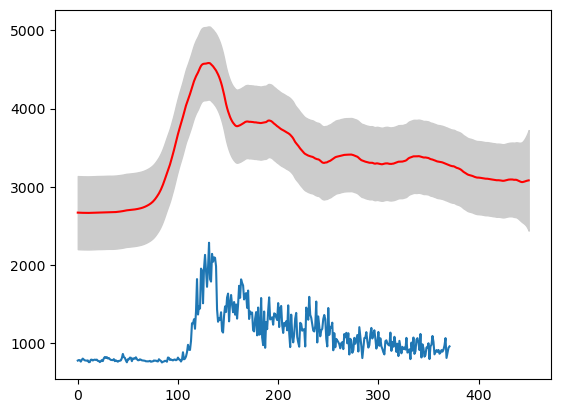

In [77]:
plt.plot(df['CO2'])
i = 9

array = new_sol[i*nt:(i+1)*nt]
ind = np.where(array==max(array))[0][0]
ind2 = np.where(df['CO2']==max(df['CO2']))[0][0]
diff = ind - ind2

plt.plot([x - np.arange(nt)[diff:][0] for x in np.arange(nt)[diff:]], array[diff:], color = 'red')
plt.fill_between([x - np.arange(nt)[diff:][0] for x in np.arange(nt)[diff:]], (array - 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]))[diff:],
                    (new_sol[i*nt:(i+1)*nt] + 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]))[diff:], color= "0.8")

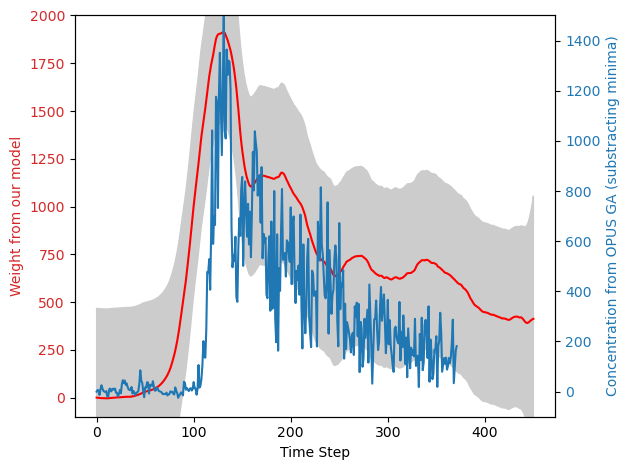

In [93]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Weight from our model', color=color)
ax1.plot([x - np.arange(nt)[diff:][0] for x in np.arange(nt)[diff:]], [x - array[diff:][0] for x in array[diff:]], color = 'red')
ax1.fill_between([x - np.arange(nt)[diff:][0] for x in np.arange(nt)[diff:]], [x - array[diff:][0] for x in(array - 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]))[diff:]],
                    [x - array[diff:][0] for x in (new_sol[i*nt:(i+1)*nt] + 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]))[diff:]], color= "0.8")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Concentration from OPUS GA (substracting minima)', color=color)  # we already handled the x-label with ax1
ax2.plot([x - df['CO2'][0] for x in df['CO2']], color = color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.set_ylim(-100,1500)
ax1.set_ylim(-100,2000)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Text(0.5, 1.0, 'CO2')

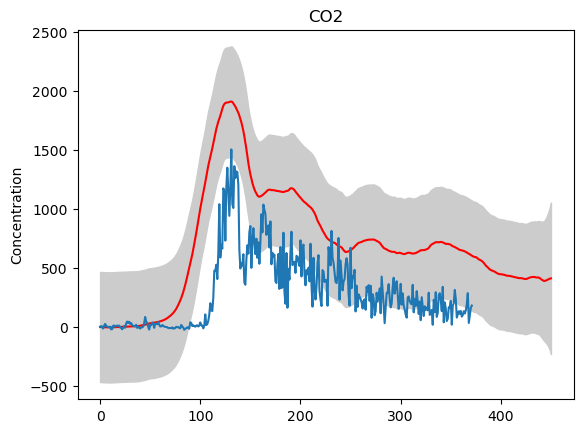

In [128]:
fig, ax1 = plt.subplots()
i = 9
array = new_sol[i*nt:(i+1)*nt]
ind = np.where(array==max(array))[0][0]
ind2 = np.where(df['CO2']==max(df['CO2']))[0][0]
diff = ind - ind2


ax1.plot([x - np.arange(nt)[diff:][0] for x in np.arange(nt)[diff:]], [x - array[diff:][0] for x in array[diff:]], color = 'red')
ax1.fill_between([x - np.arange(nt)[diff:][0] for x in np.arange(nt)[diff:]], [x - array[diff:][0] for x in(array - 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]))[diff:]],
                    [x - array[diff:][0] for x in (new_sol[i*nt:(i+1)*nt] + 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]))[diff:]], color= "0.8")
ax1.tick_params(axis='y')

ax1.set_ylabel('Concentration')  # we already handled the x-label with ax1
ax1.plot([x - df['CO2'][0] for x in df['CO2']], color = color)
ax1.set_title('CO2')

Text(0.5, 1.0, 'CO')

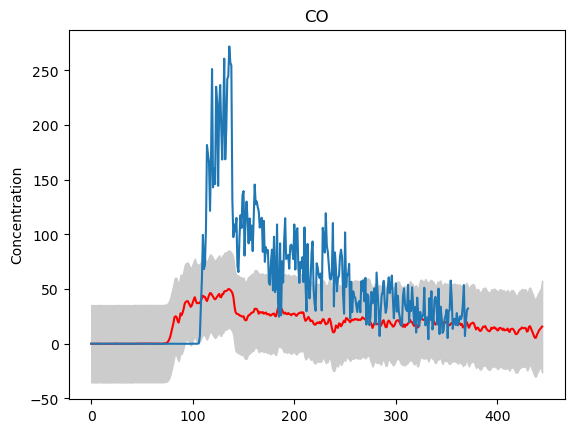

In [129]:
i = 8

array = new_sol[i*nt:(i+1)*nt]
ind = np.where(array==max(array))[0][0]
ind2 = np.where(df['CO']==max(df['CO']))[0][0]
diff = ind - ind2


fig, ax1 = plt.subplots()


ax1.plot([x - np.arange(nt)[diff:][0] for x in np.arange(nt)[diff:]], [x - array[diff:][0] for x in array[diff:]], color = 'red')
ax1.fill_between([x - np.arange(nt)[diff:][0] for x in np.arange(nt)[diff:]], [x - array[diff:][0] for x in(array - 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]))[diff:]],
                    [x - array[diff:][0] for x in (new_sol[i*nt:(i+1)*nt] + 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]))[diff:]], color= "0.8")
ax1.tick_params(axis='y')

ax1.set_ylabel('Concentration')  # we already handled the x-label with ax1
ax1.plot([x - df['CO'][0] for x in df['CO']], color = color)
ax1.set_title('CO')

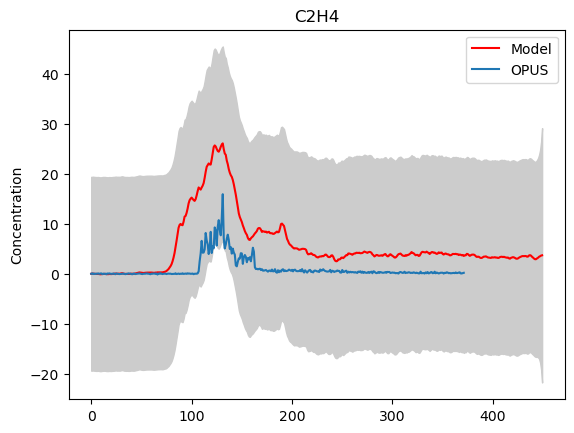

In [124]:
i = 3

array = new_sol[i*nt:(i+1)*nt]
ind = np.where(array==max(array))[0][0]
ind2 = np.where(df['C2H4']==max(df['C2H4']))[0][0]
diff = ind - ind2


fig, ax1 = plt.subplots()


ax1.plot([x - np.arange(nt)[diff:][0] for x in np.arange(nt)[diff:]], [x - array[diff:][0] for x in array[diff:]], color = 'red', label='Model')
ax1.fill_between([x - np.arange(nt)[diff:][0] for x in np.arange(nt)[diff:]], [x - array[diff:][0] for x in(array - 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]))[diff:]],
                    [x - array[diff:][0] for x in (new_sol[i*nt:(i+1)*nt] + 0.5*np.sqrt(sigma[i*nt:(i+1)*nt]))[diff:]], color= "0.8")
ax1.tick_params(axis='y')

ax1.set_ylabel('Concentration')  # we already handled the x-label with ax1
ax1.set_title('C2H4')
ax1.plot([x - df['C2H4'][0] for x in df['C2H4']], color = color, label= 'OPUS')

plt.legend()